In [1]:
import numpy as np
import seaborn, os
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as stats

In [2]:
np.set_printoptions(precision=4, suppress=True)

In [31]:
%matplotlib inline

In [3]:
def leer_datos(het):
    files = os.listdir("../datos/exp1b")
    files.sort()
    files = list(filter(lambda x: x[7] == het, files))
    
    datos = [np.load("../datos/exp1b/" + file) for file in files]
    comunidad = [file[10:13] for file in files]
    
    return datos, comunidad

In [4]:
datos = np.zeros((5, 100, 10, 6, 10, 10, 10)) # het, comunidad, intensificación, tiempo, x, y, especies
for het in range(5):
    datos[het] = leer_datos(str(het))[0]

Para una comunidad (en un nivel de heterogeneidad e intensificación), ¿cuál es la abundancia promedio de cada especie en las últimas n iteraciones?

In [22]:
# Pruebas
het = 4
intensificacion = 9
comunidad = 0
#n = 6
#especie = 1

promedio = np.zeros(10)

for especie in range(10):
    promedio[especie] = np.sum(datos[het, comunidad, intensificacion, :, :, :, especie]) / 6

In [47]:
# Hay una mejor forma de hacerlo...
for het in range(5):
    for intensificacion in range(10):
        
        promedios = np.zeros((100, 10))
        
        for comunidad in range(100):
            for especie in range(10): 
                promedios[comunidad, especie] = np.sum(datos[het, comunidad, intensificacion, -1, :, :, especie])
                
        
        np.save('../datos/abundancia/exp1b_{}_{}'.format(het, intensificacion), promedios)

In [ ]:
¿Cómo se compara la abundancia de una especie en un nivel dado de heterogeneidad, intensificación, con la dinámica sin espacio?

In [55]:
test = np.load('../datos/abundancia/exp1b_0_0.npy')
test1 = np.load('../datos/abundancia/exp1b_0_9.npy')

In [49]:
lv = np.load('../datos/exp3.npy')

<Container object of 10 artists>

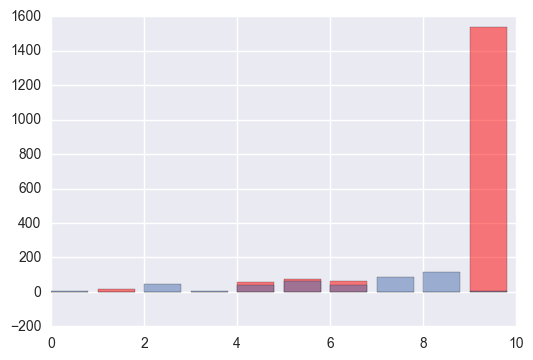

In [50]:
plt.bar(range(10), test[0], alpha=0.5, color='r')
plt.bar(range(10), lv[0], alpha=0.5)

In [92]:
test[52]

array([ 326.4395,    0.    ,    0.    ,  977.1437,    0.    ,  793.0284,
        393.488 ,  527.9789,  256.3677,    0.    ])

In [93]:
test1[52]

array([ 214.4774,    0.    ,    0.    ,  642.0031,    0.    ,  521.0357,
        258.5295,  346.8928,  168.4388,    0.    ])

In [94]:
lv[52]

array([   2.7619,    8.6798,   -0.    ,    0.    ,   -0.    ,    0.    ,
          0.    ,  714.3083,   21.2213,   20.7864])

In [99]:
sum(test[0] > lv[0]*10)

2

In [101]:
sum(test1[0] > lv[0]*10)

2

In [62]:
59.7/90.8

0.657488986784141

In [111]:
np.mean(test1[7])

20.110624767304547